In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Read Data

In [ ]:
df=pd.read_csv('/content/sample_data/DailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head(10)

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
2014-01-06,22.0,39.0,31.0,658,1759
2014-01-07,28.0,45.0,37.0,658,1759
2014-01-08,30.0,41.0,36.0,659,1800
2014-01-09,29.0,42.0,36.0,659,1801


#Plot Your Data

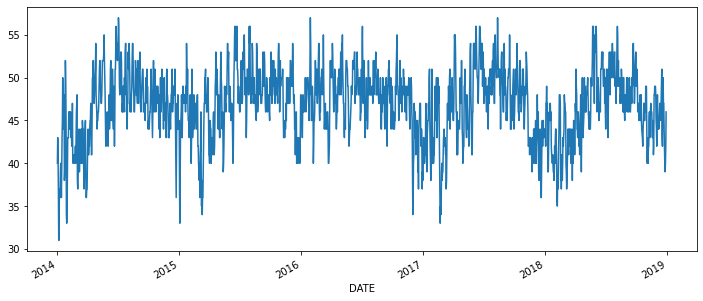

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


# ACF, PACF

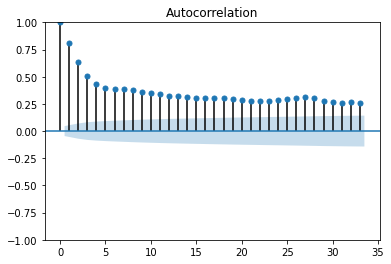

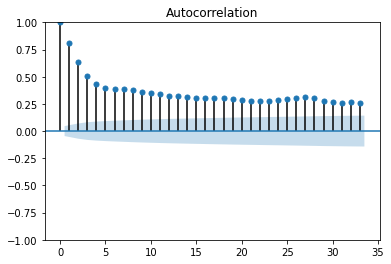

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['AvgTemp'])

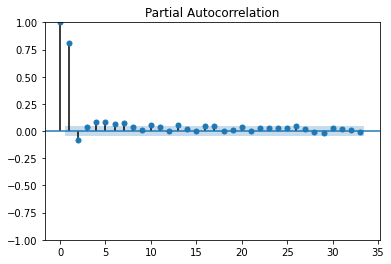

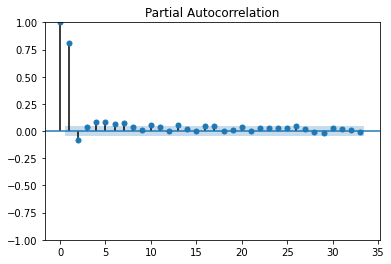

In [ ]:
plot_pacf(df['AvgTemp'])

#Figure Out Order for ARIMA Model

In [ ]:
!pip install pmdarima

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
                          suppress_warnings=True)           

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=2.71 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=3.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=3.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=2.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=3.52 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=3.74 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=4.26 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=4.01 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df['AvgTemp'], order = (1,0,5))
model_fit = model_arima.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Sat, 22 Jan 2022   AIC                           8292.261
Time:                        04:20:56   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5285      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.909      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.0